In [1]:
from tensorflow.keras.datasets import imdb
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn')

In [2]:
((X_train,y_train),(X_test,y_test)) = imdb.load_data()

In [3]:
word_idx = imdb.get_word_index()
voc_size = (max(list(word_idx.values()))+3)

In [4]:
idx_word = dict([value,key] for (key,value) in word_idx.items())
actual_review = ' '.join([idx_word.get(idx-3,'?') for idx in X_train[0]])
print(actual_review)

? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert redford's is an amazing actor and now the same being director norman's father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for retail and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also congratulations to the two little boy's that played the part's of norman and paul they were just brilliant children are often left out of the praising list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be

In [5]:
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.layers import Embedding,SimpleRNN,Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping

In [6]:
X_train = sequence.pad_sequences(X_train,maxlen=500)
X_test = sequence.pad_sequences(X_test,maxlen=500)

In [7]:
model = Sequential()
model.add(Embedding(voc_size,64))
model.add(SimpleRNN(32))
model.add(Dense(1,activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 64)          5669568   
_________________________________________________________________
simple_rnn (SimpleRNN)       (None, 32)                3104      
_________________________________________________________________
dense (Dense)                (None, 1)                 33        
Total params: 5,672,705
Trainable params: 5,672,705
Non-trainable params: 0
_________________________________________________________________


In [8]:
model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=["acc"])

In [9]:
checkpoint = ModelCheckpoint("best_model.h5",monitor='val_acc',verbose=0,save_best_only=True,save_weights_only=False,mode='auto',period=1)
earlystop = EarlyStopping(monitor="val_acc",patience=2)
history = model.fit(X_train,y_train,validation_split=0.2,epochs=10,batch_size=128,callbacks=[checkpoint,earlystop])

Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 44s 2ms/sample - loss: 0.5492 - acc: 0.7121 - val_loss: 0.4719 - val_acc: 0.7894
Epoch 2/10
20000/20000 [==============================] - 44s 2ms/sample - loss: 0.3125 - acc: 0.8778 - val_loss: 0.3538 - val_acc: 0.8516
Epoch 3/10
20000/20000 [==============================] - 44s 2ms/sample - loss: 0.2132 - acc: 0.9220 - val_loss: 0.3783 - val_acc: 0.8522
Epoch 4/10
20000/20000 [==============================] - 44s 2ms/sample - loss: 0.1340 - acc: 0.9530 - val_loss: 0.3570 - val_acc: 0.8674
Epoch 5/10
20000/20000 [==============================] - 43s 2ms/sample - loss: 0.0740 - acc: 0.9766 - val_loss: 0.4003 - val_acc: 0.8638
Epoch 6/10
20000/20000 [==============================] - 44s 2ms/sample - loss: 0.0404 - acc: 0.9883 - val_loss: 0.5513 - val_acc: 0.8030


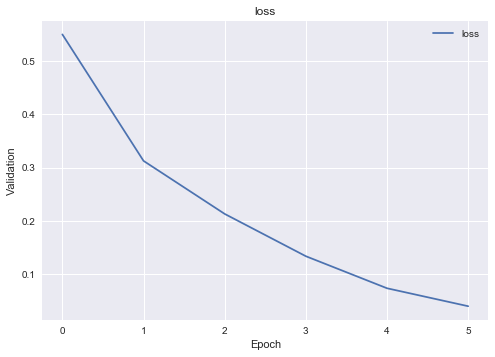

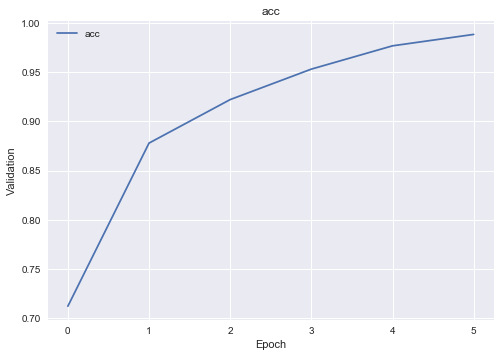

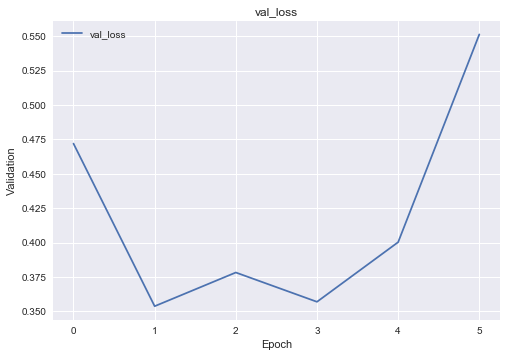

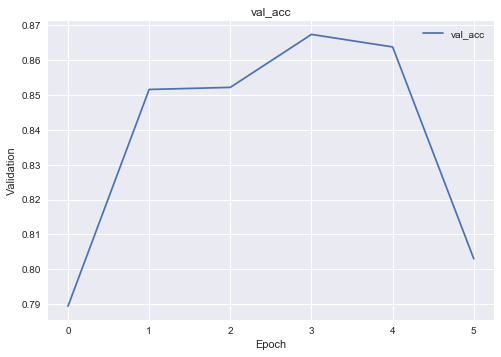

In [10]:
for key,values in (history.history).items():
    plt.plot(values,label = key)
    plt.xlabel("Epoch")
    plt.ylabel("Validation")
    plt.legend()
    plt.title(key)
    plt.show()

In [11]:
model.save("my_model.h5")

In [12]:
ls

 Volume in drive C is win-10
 Volume Serial Number is 62D0-C2B8

 Directory of C:\Users\jgoel\Desktop\Data Science Self\Deep Learning\Recurrent Neural Network

06/22/2020  07:17 PM    <DIR>          .
06/22/2020  07:17 PM    <DIR>          ..
06/22/2020  03:49 PM    <DIR>          .ipynb_checkpoints
06/22/2020  07:17 PM        45,412,088 best_model.h5
06/22/2020  07:17 PM             8,446 Movie Review Prediction using RNN.ipynb
06/22/2020  07:18 PM        45,412,088 my_model.h5
               3 File(s)     90,832,622 bytes
               3 Dir(s)  54,109,691,904 bytes free


In [13]:
model.load_weights("my_model.h5")

In [14]:
loss,accuracy =model.evaluate(X_test,y_test)

print("Testing Accuracy = ",accuracy*100)
print("Test Loss = ",loss)

25000/25000 [==============================] - 50s 2ms/sample - loss: 0.5646 - acc: 0.7973
Testing Accuracy =  79.7320008277893
Test Loss =  0.564626332321167


In [15]:
loss,acc = model.evaluate(X_train,y_train)

print("Training Accuracy = ",acc*100)
print("Training Loss = ",loss)

25000/25000 [==============================] - 50s 2ms/sample - loss: 0.1353 - acc: 0.9547
Training Accuracy =  95.46800255775452
Training Loss =  0.13527968650758265


In [16]:
model.load_weights("best_model.h5")

In [17]:
loss,accuracy =model.evaluate(X_test,y_test)

print("Testing Accuracy Of Best Model= ",accuracy*100)
print("Test Loss Of Best Model= ",loss)

25000/25000 [==============================] - 50s 2ms/sample - loss: 0.3703 - acc: 0.8612
Testing Accuracy Of Best Model=  86.11599802970886
Test Loss Of Best Model=  0.3702762946605682


In [19]:
loss,acc = model.evaluate(X_train,y_train)

print("Training Accuracy Of Best Model= ",acc*100)
print("Training Loss Of Best Model= ",loss)

25000/25000 [==============================] - 48s 2ms/sample - loss: 0.1161 - acc: 0.9614
Training Accuracy Of Best Model=  96.13999724388123
Training Loss Of Best Model=  0.11609225066661835
